In [1]:
import pandas as pd
import numpy as np

In [2]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
info = pd.read_csv('data/info1.csv', encoding='utf-8')
samp_cst_feat = pd.read_csv('data/samp_cst_feat.csv', encoding='ISO-8859-1')
samp_train = pd.read_csv('data/samp_train.csv', encoding='ISO-8859-1')

In [4]:
info

,MRC_ID_DI,Category
0,0,미이용
1,1,홈쇼핑
2,2,종합물
3,3,종합몰
4,4,전문몰
5,5,종합몰
6,6,홈쇼핑
7,7,오픈마켓_소셜
8,8,홈쇼핑
9,9,전문몰


In [5]:
samp_cst_feat

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,-0.19780,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [6]:
total_df = samp_cst_feat.copy()
total_df['label'] = samp_train['MRC_ID_DI']
total_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,8
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,5
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995,7
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301,0
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357,0
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931,0


In [7]:
df = total_df.copy()

In [8]:
dtype_df_raw = pd.read_excel("data/variable_dtype.xlsx")

dtype_dict = dtype_df_raw.set_index('Variable_Name')['dType'].to_dict()

#카테고리컬 변수타입 변환
for w in total_df.columns:
    if w in dtype_dict.keys():
        if dtype_dict[w] == "categorical":
            df[w] = total_df[w].astype(str)
df.dtypes.head(10)

cst_id_di      int64
VAR002       float64
VAR003       float64
VAR004       float64
VAR005       float64
VAR006       float64
VAR007        object
VAR008       float64
VAR009       float64
VAR010       float64
dtype: object

In [9]:
df_raw = total_df.copy()

In [10]:
X = df_raw.drop(['label'], axis = 1)
Y = df_raw['label']
X = StandardScaler().fit_transform(X)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
#PCA_df = pd.concat([PCA_df, df['label']], axis = 1)
#PCA_df['label'] = LabelEncoder().fit_transform(PCA_df['label'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,7.279507,-3.813250,5.084972,-5.013254,-0.228568
1,14.681195,4.586905,-2.685685,2.918946,-3.615019
2,-14.916882,-1.823236,0.040112,-1.621078,-5.170000
3,-3.165472,4.684853,-3.915588,-4.432157,1.878757
4,19.599368,7.075075,4.594998,2.728054,-0.535316


In [12]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(PCA_df, Y, test_size = 0.30, random_state = 101)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_Over,Y_Over = smote.fit_sample(X_Train, Y_Train)

In [14]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_Over.shape, Y_Over.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_Over.shape, Y_Over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(Y_Over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (63030, 5) (63030,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (63030, 5) (63030,)
SMOTE 적용 후 레이블 값 분포: 
 10    5730
9     5730
8     5730
7     5730
6     5730
5     5730
4     5730
3     5730
2     5730
1     5730
0     5730
Name: label, dtype: int64


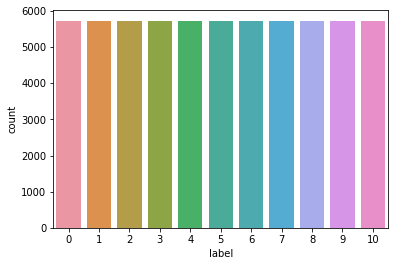

In [15]:
import seaborn as sns
temp = X_Over
temp['label'] = Y_Over
graph = sns.countplot(data = temp, x = 'label')

In [16]:
temp

,PC1,PC2,PC3,PC4,PC5,label
0,4.966258,-6.581724,3.232415,2.753349,-4.075458,0
1,-12.527290,2.070621,-3.308316,-5.028605,0.737245,0
2,6.232014,-1.494108,-1.457461,-0.518616,-2.062716,0
3,-14.265153,4.175796,-2.372703,-0.914909,-4.386474,0
4,8.461358,2.066808,-6.614021,0.776355,1.428869,7
...,...,...,...,...,...,...
63025,17.200932,6.686031,4.008891,4.659746,2.165552,10
63026,9.096184,-1.584885,0.853913,1.514635,-3.365999,10
63027,9.415583,1.188194,0.549581,0.008269,-0.904621,10
63028,4.851889,0.468695,3.950537,-4.705103,0.742529,10


In [34]:
def forest_test(X_Train, X_Test, Y_Train, Y_Test):
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [36]:
forest_test(X_Over,X_Test,Y_Over, Y_Test)

89.995475
[[1750   55   15   32    6   60  176  183  141   33   19]
 [  14    3    0    1    0    0    5    1    6    1    0]
 [   1    0    0    0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    3    1    0    0    2    0]
 [   0    0    0    1    0    1    0    1    1    0    0]
 [   7    0    2    2    0    1    3    9    4    0    0]
 [  52    8    4    3    4   12   20   28   25    4    3]
 [  51   11    3    9    0   17   25   49   14    7    6]
 [  30    5    2    4    0    5   13   13   19    4    3]
 [  12    0    0    3    0    1    1    2    3    3    1]
 [   5    0    2    0    0    0    1    5    0    1    1]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2470
           1       0.04      0.10      0.05        31
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         4
           5       0.01   

In [56]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [58]:
model = XGBClassifier()
model.fit(X_Over, Y_Over)

y_pred = model.predict(X_Test) 

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(Y_Test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.00%
